# Comparing Models

Notebook for creating plots comparing the rmse and R2 score across models and datasets

### Imports and Plot Style

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
from pathlib import Path
import importlib

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# fix file path
sys.path.append(str(Path("..").resolve()))

from Implementations import prepare_data
importlib.reload(prepare_data)

from Implementations.prepare_data import prepare_data

from Implementations import plot_style
importlib.reload(plot_style)
from Implementations.plot_style import set_latex_style, fig_ax, save_pdf

## Input results

We collect the final test-set metrics from the experiments:

- Ridge (Core)
- NN (Core)
- Ridge (Extended)
- NN (Extended)

The values below are the numbers reported in the Results section and Table~\ref{tab:model-comparison}.


In [2]:
results = [
    {"Model": "Ridge", "Features": "Core",     "Arch/Reg": r"$\lambda=1.78\times10^2$", "R2": 0.5059, "RMSE": 1.0631},
    {"Model": "NN",    "Features": "Core",     "Arch/Reg": "ReLU [64--64--1]",          "R2": 0.6024, "RMSE": 0.9537},
    {"Model": "Ridge", "Features": "Extended", "Arch/Reg": r"$\lambda=1.21\times10^3$", "R2": 0.5484, "RMSE": 1.0165},
    {"Model": "NN",    "Features": "Extended", "Arch/Reg": "ReLU [64--64--1]",          "R2": 0.6335, "RMSE": 0.9157},
]

df = pd.DataFrame(results)
df


,Model,Features,Arch/Reg,R2,RMSE
0,Ridge,Core,$\lambda=1.78\times10^2$,0.5059,1.0631
1,NN,Core,ReLU [64--64--1],0.6024,0.9537
2,Ridge,Extended,$\lambda=1.21\times10^3$,0.5484,1.0165
3,NN,Extended,ReLU [64--64--1],0.6335,0.9157


In [3]:
assert df["R2"].between(-1, 1).all(), "R2 values should typically lie within [-1, 1]."
assert (df["RMSE"] > 0).all(), "RMSE must be positive."
assert df.isna().sum().sum() == 0, "No missing values allowed in the comparison table."

print("Sanity checks passed.")


Sanity checks passed.


## Plot 1: Test \(R^2\)

We visualize test \(R^2\) for Ridge and NN on the Core and Extended feature sets.
The figure is saved as `../Plots/fig_model_comparison_r2.pdf`.


Saved: ../Plots/fig_model_comparison_r2.pdf


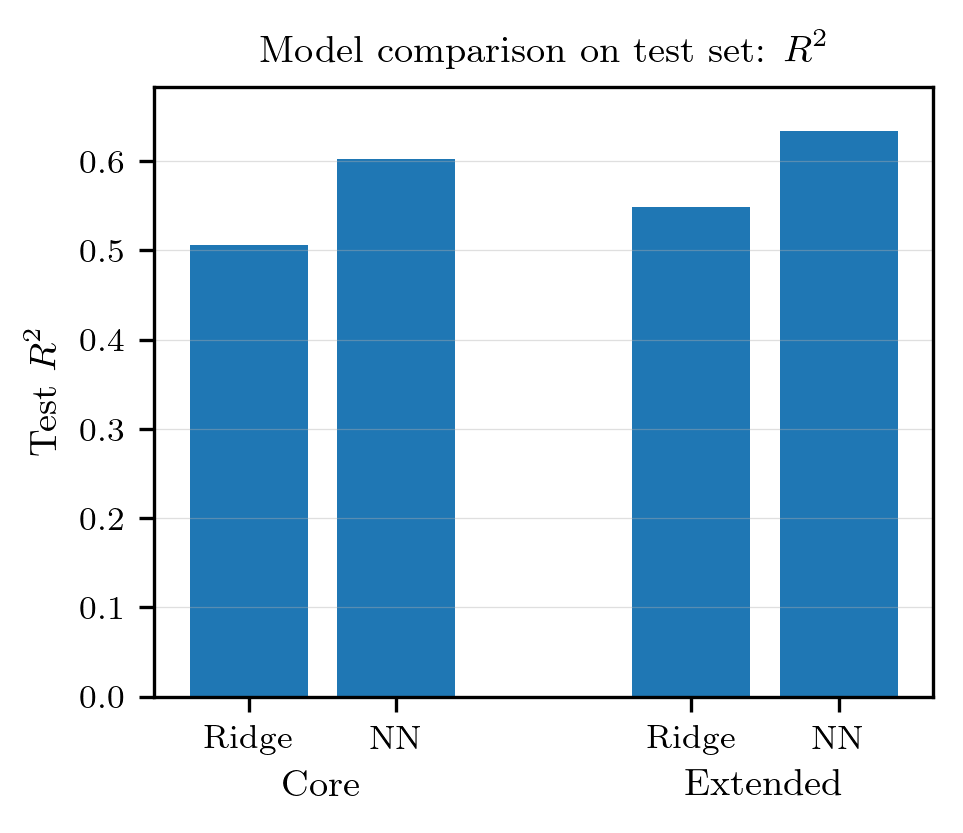

In [4]:
set_latex_style(usetex=True)

# Arrange bars as two groups (Core, Extended) with two bars each (Ridge, NN)
order = [("Core", "Ridge"), ("Core", "NN"), ("Extended", "Ridge"), ("Extended", "NN")]
vals_r2 = [df[(df["Features"] == f) & (df["Model"] == m)]["R2"].values[0] for f, m in order]

x = np.array([0, 1, 3, 4], dtype=float)   # spacing: Core (0,1), Extended (3,4)
labels = ["Ridge", "NN", "Ridge", "NN"]

fig, ax = fig_ax("onecol", height_scale=1.2)

ax.bar(x, vals_r2)
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Group labels under bars
ax.text(0.5, -0.12, "Core", transform=ax.get_xaxis_transform(),
        ha="center", va="top")
ax.text(3.5, -0.12, "Extended", transform=ax.get_xaxis_transform(),
        ha="center", va="top")

ax.set_ylabel(r"Test $R^2$")
ax.set_title(r"Model comparison on test set: $R^2$")

ax.set_ylim(0, max(vals_r2) + 0.05)
ax.grid(True, axis="y", linewidth=0.3, alpha=0.4)

save_pdf(fig, "fig_model_comparison_r2.pdf", folder="../Plots")
print("Saved: ../Plots/fig_model_comparison_r2.pdf")


## Plot 2: Test RMSE

We visualize test RMSE (log market value) for Ridge and NN on the Core and Extended feature sets.
The figure is saved as `../Plots/fig_model_comparison_rmse.pdf`.


Saved: ../Plots/fig_model_comparison_rmse.pdf


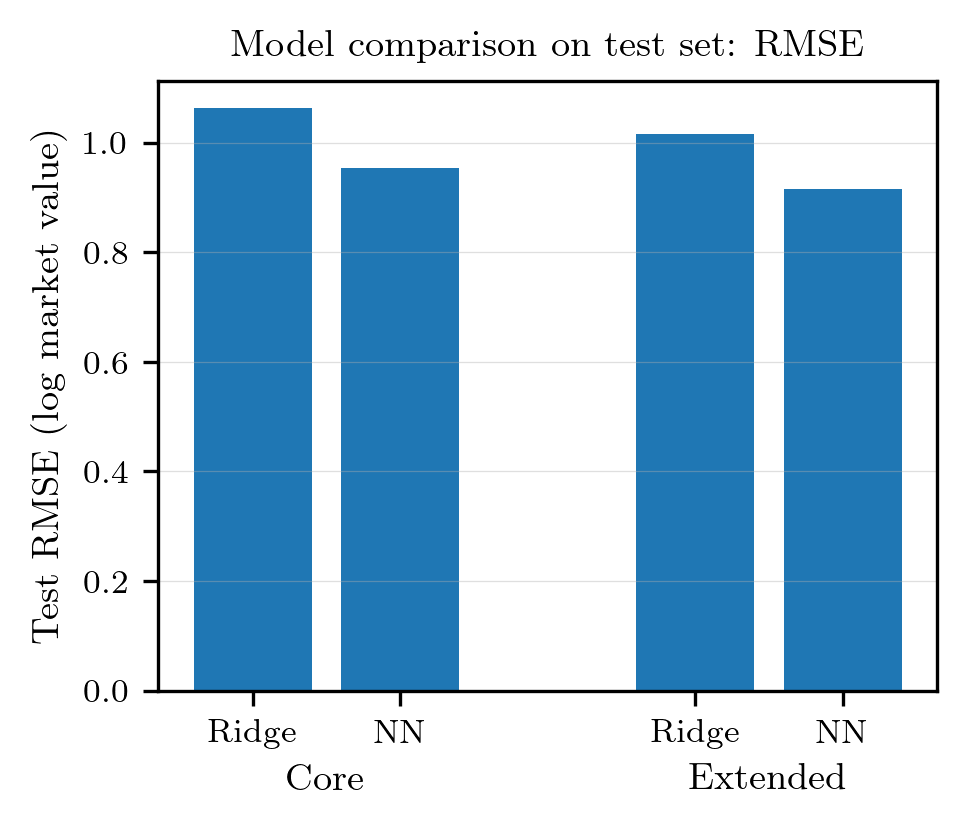

In [5]:
set_latex_style(usetex=True)

vals_rmse = [df[(df["Features"] == f) & (df["Model"] == m)]["RMSE"].values[0] for f, m in order]

fig, ax = fig_ax("onecol", height_scale=1.2)

ax.bar(x, vals_rmse)
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.text(0.5, -0.12, "Core", transform=ax.get_xaxis_transform(),
        ha="center", va="top")
ax.text(3.5, -0.12, "Extended", transform=ax.get_xaxis_transform(),
        ha="center", va="top")

ax.set_ylabel(r"Test RMSE (log market value)")
ax.set_title(r"Model comparison on test set: RMSE")

ax.set_ylim(0, max(vals_rmse) + 0.05)
ax.grid(True, axis="y", linewidth=0.3, alpha=0.4)

save_pdf(fig, "fig_model_comparison_rmse.pdf", folder="../Plots")
print("Saved: ../Plots/fig_model_comparison_rmse.pdf")
